In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', -1)

# 1. Run

## Params for 1. Run

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from stop_words import get_stop_words

pipe_logreg = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipe_logreg_params = {

    'logisticregression__C': [0.1, 0.5, 1, 3, 7, 10],
    'logisticregression__penalty': ['l2', 'l1'],
    'logisticregression__solver': ['liblinear', 'lbfgs']
    
}

logreg = [pipe_logreg, pipe_logreg_params]

pipe_svm = make_pipeline(TfidfVectorizer(), LinearSVC())
pipe_svm_params = {
    'linearsvc__C': [0.1, 0.5, 1, 3, 7, 10],
    'linearsvc__penalty': ['l2', 'l1']
    
}

svm = [pipe_svm, pipe_svm_params]

pipe_naivebayes = make_pipeline(TfidfVectorizer(), MultinomialNB())
nb = [pipe_naivebayes, {}]

pipe_dectree = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
pipe_dectree_params = {
    'decisiontreeclassifier__max_features': ["auto", "sqrt", "log2"],
    'decisiontreeclassifier__max_depth': [None, 100, 125, 150, 175, 200],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10, 20], 
}

dectree = [pipe_dectree, pipe_dectree_params]


pipe_randomforest = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
pipe_randomforest_params = {
    'randomforestclassifier__n_estimators': [5, 100, 400, 1000],
}

randomforest = [pipe_randomforest, pipe_randomforest_params]


all_pipes_params = [logreg, svm, dectree, randomforest, nb]

In [4]:
tables_firstrun = glob.glob('hyperparam_results/FirstRun/*.csv')
tables_firstrun

['hyperparam_results/FirstRun\\decisiontreeclassifier_P1.csv',
 'hyperparam_results/FirstRun\\linearsvc_P1.csv',
 'hyperparam_results/FirstRun\\logisticregression_P1.csv',
 'hyperparam_results/FirstRun\\multinomialnb_P1.csv',
 'hyperparam_results/FirstRun\\randomforestclassifier_P1.csv']

In [5]:
logreg_results = pd.read_csv('hyperparam_results/FirstRun/logisticregression_P1.csv').dropna()
nb_results = pd.read_csv('hyperparam_results/FirstRun/multinomialnb_P1.csv')
svm_results = pd.read_csv('hyperparam_results/FirstRun/linearsvc_P1.csv').dropna()
dectree_results = pd.read_csv('hyperparam_results/FirstRun/decisiontreeclassifier_P1.csv').dropna()
randomforest_results = pd.read_csv('hyperparam_results/FirstRun/randomforestclassifier_P1.csv').dropna()

# Logistic Regression

In [6]:
logreg_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
21,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.713492
17,"{'logisticregression__C': 7, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.709921
12,"{'logisticregression__C': 3, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.693968
20,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.691984
16,"{'logisticregression__C': 7, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.689048
13,"{'logisticregression__C': 3, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.685159
22,"{'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}",0.673651
9,"{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.667619
8,"{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.665159
4,"{'logisticregression__C': 0.5, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}",0.656587


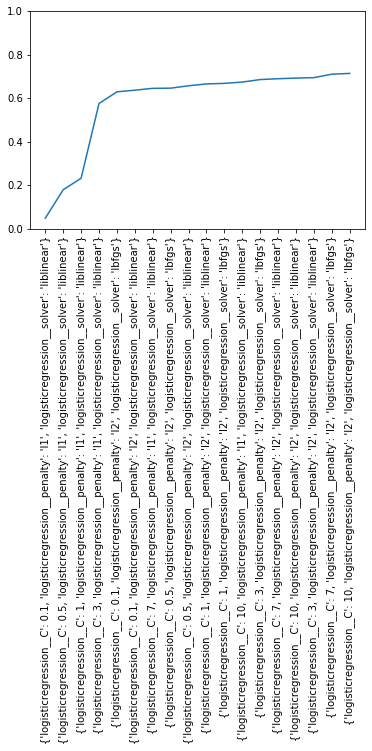

In [7]:
plot_df = logreg_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Logreg Results:

1. With increasing C-Value Scores improve. => Next run with C-Values in range 10-20
2. Solver lbfgs works best => remove other solver (liblinear)
3. Remove l1-reg

# MultinomialNB

In [8]:
nb_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
0,{},0.652937


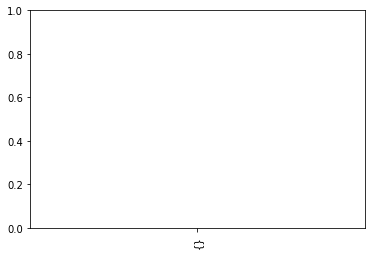

In [9]:
plot_df = nb_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

In [10]:
svm_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
6,"{'linearsvc__C': 3, 'linearsvc__penalty': 'l2'}",0.716905
8,"{'linearsvc__C': 7, 'linearsvc__penalty': 'l2'}",0.705317
10,"{'linearsvc__C': 10, 'linearsvc__penalty': 'l2'}",0.705317
4,"{'linearsvc__C': 1, 'linearsvc__penalty': 'l2'}",0.695794
2,"{'linearsvc__C': 0.5, 'linearsvc__penalty': 'l2'}",0.664921
0,"{'linearsvc__C': 0.1, 'linearsvc__penalty': 'l2'}",0.662857


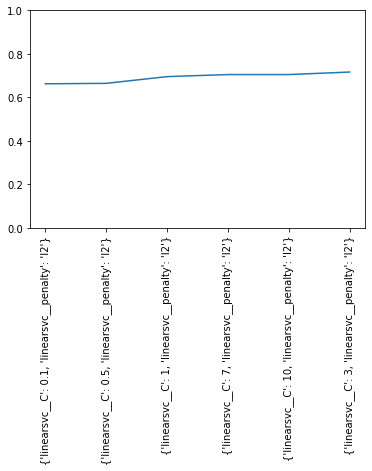

In [11]:
plot_df = svm_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### LinearSVC Results:

1. C Values 3,7 work best => Try with alues in that range
2. L1-Reg does not work => remove it

# Decision Tree

In [12]:
dectree_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][['params', 'mean_test_score']][:10]

,params,mean_test_score
64,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 2}",0.404180
31,"{'decisiontreeclassifier__max_depth': 125, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 20}",0.392275
69,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 5}",0.380084
24,"{'decisiontreeclassifier__max_depth': 125, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 2}",0.375000
43,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 20}",0.372871
14,"{'decisiontreeclassifier__max_depth': 100, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.370298
65,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 5}",0.369315
66,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 10}",0.362566
41,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__min_samples_split': 5}",0.355847
44,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__min_samples_split': 2}",0.353102


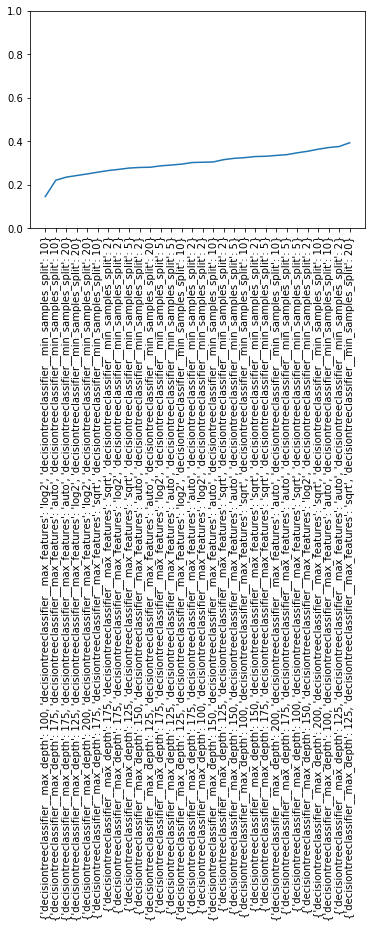

In [13]:
plot_df = dectree_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df)))[::2], plot_df.mean_test_score[::2])
plt.xticks(list(range(len(plot_df)))[::2], list(map(str, plot_df.params))[::2], rotation=90)
plt.ylim(0,1)
plt.show()

### DecTree Results:
1. Does not work will in general
2. Try min_samples split greateer than 10

# RandomForest

In [14]:
randomforest_results.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
3,{'randomforestclassifier__n_estimators': 1000},0.785635
2,{'randomforestclassifier__n_estimators': 400},0.767460
1,{'randomforestclassifier__n_estimators': 100},0.708333
0,{'randomforestclassifier__n_estimators': 5},0.320404


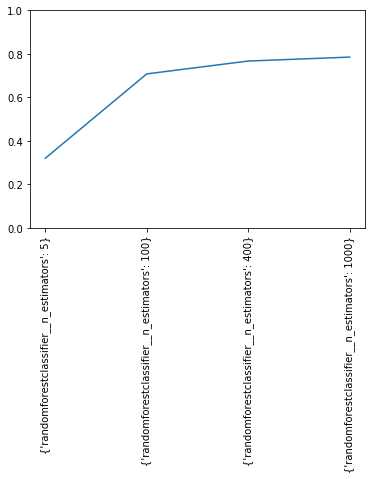

In [15]:
plot_df = randomforest_results.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Randomforest-Results:

1. Performance increases with number of estimators => Try with more than thousand estimators and values between 400, 1000

# 2. Run

## Params for Second Run

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from stop_words import get_stop_words

pipe_logreg = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipe_logreg_params = {

    'logisticregression__C': list(range(10,21)),
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs']
    
}

logreg = [pipe_logreg, pipe_logreg_params]

pipe_svm = make_pipeline(TfidfVectorizer(), LinearSVC())
pipe_svm_params = {
    'linearsvc__C': [3, 4, 5, 6, 7,],
    'linearsvc__penalty': ['l2']
    
}

svm = [pipe_svm, pipe_svm_params]

pipe_naivebayes = make_pipeline(TfidfVectorizer(), MultinomialNB())
nb = [pipe_naivebayes, {'multinomialnb__alpha': [list(range(1,10))]}]

pipe_dectree = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
pipe_dectree_params = {
    'decisiontreeclassifier__max_features': ["auto"],
    'decisiontreeclassifier__max_depth': [None],
    'decisiontreeclassifier__min_samples_split': [10, 15, 20, 25, 30], 
}

dectree = [pipe_dectree, pipe_dectree_params]


pipe_randomforest = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
pipe_randomforest_params = {
    'randomforestclassifier__n_estimators': [400, 500, 750, 1000, 1250, 1500, 1750, 2000],
}

randomforest = [pipe_randomforest, pipe_randomforest_params]


all_pipes_params = [logreg, svm, dectree, randomforest, nb]

In [17]:
tables_secondrun = glob.glob('hyperparam_results/SecondRun/*.csv')
tables_secondrun

['hyperparam_results/SecondRun\\decisiontreeclassifier_P1.csv',
 'hyperparam_results/SecondRun\\linearsvc_P1.csv',
 'hyperparam_results/SecondRun\\logisticregression_P1.csv',
 'hyperparam_results/SecondRun\\multinomialnb_P1.csv',
 'hyperparam_results/SecondRun\\randomforestclassifier_P1.csv']

In [18]:
logreg_results2 = pd.read_csv('hyperparam_results/SecondRun/logisticregression_P1.csv').dropna()
nb_results2 = pd.read_csv('hyperparam_results/SecondRun/multinomialnb_P1.csv')
svm_results2 = pd.read_csv('hyperparam_results/SecondRun/linearsvc_P1.csv').dropna()
dectree_results2 = pd.read_csv('hyperparam_results/SecondRun/decisiontreeclassifier_P1.csv')
randomforest_results2 = pd.read_csv('hyperparam_results/SecondRun/randomforestclassifier_P1.csv').dropna()

# Logistic Regression

In [46]:
logreg_results2.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:3]

,params,mean_test_score
2,"{'logisticregression__C': 12, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.715212
3,"{'logisticregression__C': 13, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.715212
4,"{'logisticregression__C': 14, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.715212


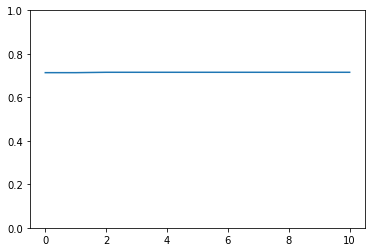

In [47]:
plot_df = logreg_results2.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
#plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Logreg Results:

1. Ab C-Wert von 12 keine Verbesserung mehr
2. Wo ist der C-Wert 11? :D Im Graph ist er da, in der Tabelle unter den Params aber nicht..


# MultinomialNB

In [21]:
nb_results2.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
0,{'multinomialnb__alpha': 0.1},0.759603
1,{'multinomialnb__alpha': 0.2},0.731349
2,{'multinomialnb__alpha': 0.3},0.722619
3,{'multinomialnb__alpha': 0.4},0.691667
4,{'multinomialnb__alpha': 0.5},0.682063
5,{'multinomialnb__alpha': 0.6},0.663175
6,{'multinomialnb__alpha': 1.0},0.652937
7,{'multinomialnb__alpha': 2.0},0.584206
8,{'multinomialnb__alpha': 3.0},0.545967
9,{'multinomialnb__alpha': 10.0},0.405856


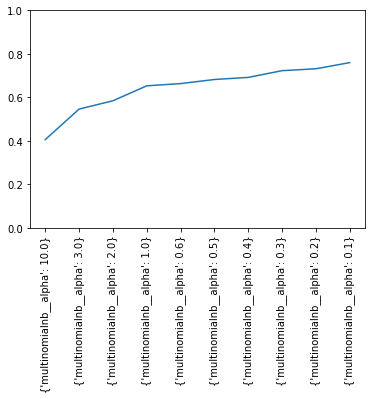

In [22]:
plot_df = nb_results2.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Naive Bayes Result mit unterschiedlichem Laplace Smoothing
1. Tatsächlich ein besseres Ergebnis mit kleineren Werten
2. dritten Run mit noch kleineren Werten Testen 0.1 bis 0.01

### SVM

In [51]:
svm_results2.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']].iloc[[0,1,2,-1]]

,params,mean_test_score
0,"{'linearsvc__C': 3, 'linearsvc__penalty': 'l2'}",0.716905
1,"{'linearsvc__C': 4, 'linearsvc__penalty': 'l2'}",0.716905
2,"{'linearsvc__C': 5, 'linearsvc__penalty': 'l2'}",0.716905
4,"{'linearsvc__C': 7, 'linearsvc__penalty': 'l2'}",0.705317


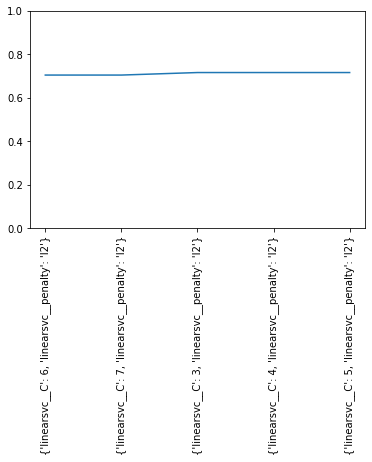

In [24]:
plot_df = svm_results2.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### LinearSVC Results:

1. Beste Ergebnisse mit einem C-Wert von 3, 4 oder 5, jeweils 0,716905. Daher kann ich mir nicht vorstellen, dass irgendein Wert zwischen 3 und 4 bzw. 4 und 5 noch besser sein wird.

# Desicion Trees

In [25]:
dectree_results2.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][['params', 'mean_test_score']][:10]

,params,mean_test_score
3,"{'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 25}",0.319740
2,"{'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 20}",0.302540
0,"{'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.281539
4,"{'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 30}",0.259550
1,"{'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 15}",0.257448


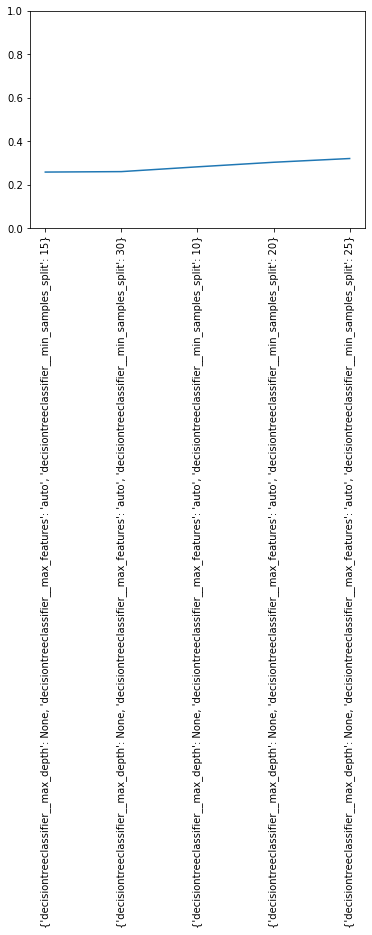

In [26]:
plot_df = dectree_results2.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

# Random Forest

In [27]:
randomforest_results2.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
6,{'randomforestclassifier__n_estimators': 1750},0.785873
7,{'randomforestclassifier__n_estimators': 2000},0.772143
5,{'randomforestclassifier__n_estimators': 1500},0.769444
2,{'randomforestclassifier__n_estimators': 750},0.764127
1,{'randomforestclassifier__n_estimators': 500},0.762857
3,{'randomforestclassifier__n_estimators': 1000},0.762143
4,{'randomforestclassifier__n_estimators': 1250},0.751349
0,{'randomforestclassifier__n_estimators': 400},0.694610


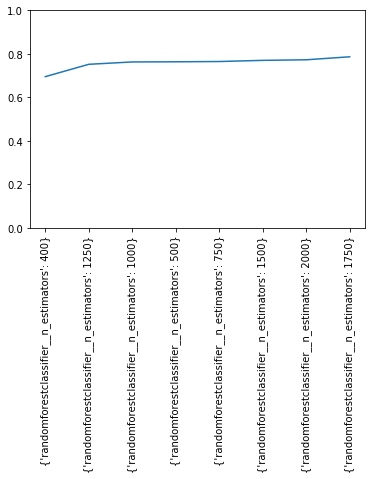

In [28]:
plot_df = randomforest_results2.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Randomforest-Results:
Momentanes Maximum bei 1750 Estimators mit einem Score von 0,785873, 1500 und 2000 Estimators weichen zwischen 0,01 und 0,015 nur ab

# 3.Run

## Parameter für den dritten Run

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from stop_words import get_stop_words


# Logreg gibt bereits nur noch konstante Werte, Wenn Überhaupt würde ich mal einen viel größeren C-Wert
# nehmen um zu schauen, ob sich da noch irgendwann was tut
pipe_logreg = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipe_logreg_params = {
    'logisticregression__C': [50],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs']    
}
logreg = [pipe_logreg, pipe_logreg_params]



# SVM haben wir bereits ein MAximum über die C-Werte 3, 4 und 5



# Naive Bayes hat momentan bei Alpha 0.1 den besten Score, daher noch kleinere Werte
pipe_naivebayes = make_pipeline(TfidfVectorizer(), MultinomialNB())
nb = [pipe_naivebayes, {'multinomialnb__alpha': []}]



# Decision Trees nochmal mit versch. Max_Depth Werten
pipe_dectree = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
pipe_dectree_params = {
    'decisiontreeclassifier__max_features': ["auto"],
    'decisiontreeclassifier__max_depth': [75, 100, 125, 150, 175],
    'decisiontreeclassifier__min_samples_split': [10, 15, 20, 25, 30], 
}
dectree = [pipe_dectree, pipe_dectree_params]


# RAndom Forests nochmal genauere Estimator Werte, vielleicht werden wir dann auch schon zu genau und overfitten..
pipe_randomforest = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
pipe_randomforest_params = {
    'randomforestclassifier__n_estimators': [1650, 1700, 1800, 1850], # Das aktuelle Maximum liegt bei 1750 Estimators
}
randomforest = [pipe_randomforest, pipe_randomforest_params]

all_pipes_params = [logreg, dectree, randomforest, nb]

In [30]:
tables_secondrun = glob.glob('hyperparam_results/ThirdRun/*.csv')
tables_secondrun

['hyperparam_results/ThirdRun\\decisiontreeclassifier_P1.csv',
 'hyperparam_results/ThirdRun\\logisticregression_P1.csv',
 'hyperparam_results/ThirdRun\\multinomialnb_P1.csv',
 'hyperparam_results/ThirdRun\\randomforestclassifier_P1.csv']

In [31]:
logreg_results3 = pd.read_csv('hyperparam_results/ThirdRun/logisticregression_P1.csv').dropna()
nb_results3 = pd.read_csv('hyperparam_results/ThirdRun/multinomialnb_P1.csv')
dectree_results3 = pd.read_csv('hyperparam_results/ThirdRun/decisiontreeclassifier_P1.csv')
randomforest_results3 = pd.read_csv('hyperparam_results/ThirdRun/randomforestclassifier_P1.csv').dropna()

# Auswertung 3. Run
# Logistic Regression

In [32]:
logreg_results3.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
0,"{'logisticregression__C': 50, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}",0.725397


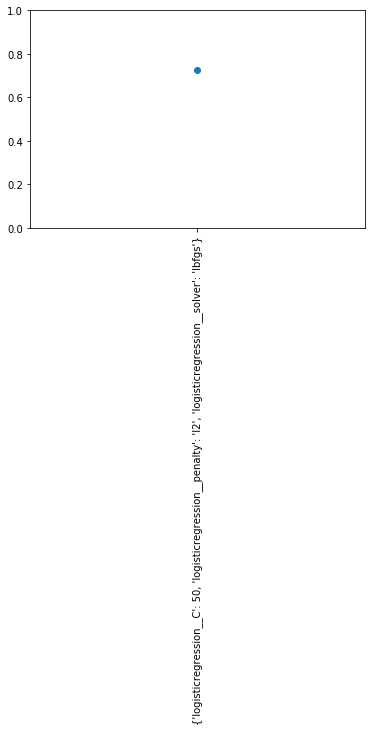

In [33]:
plot_df = logreg_results3.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score, marker='o')
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

## Auswertung
Tatsächlich wird das Ergebnis noch besser bei noch höheren C-Werten

# Naive Bayes

In [48]:
nb_results3.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:3]

,params,mean_test_score
0,{'multinomialnb__alpha': 0.01},0.776746
1,{'multinomialnb__alpha': 0.015},0.776746
2,{'multinomialnb__alpha': 0.019999999999999997},0.776746


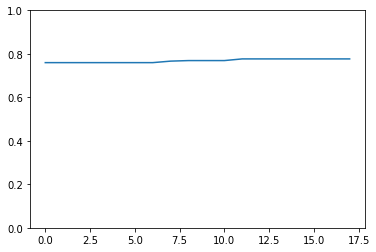

In [49]:
plot_df = nb_results3.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
#plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

### Auswertung:
je kleiner das Alpha desto besser, selber Trend wie in Run 2, wobei es sich langsam einzupendeln scheint

# Decision Trees

In [36]:
dectree_results3.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][['params', 'mean_test_score']][:10]

,params,mean_test_score
5,"{'decisiontreeclassifier__max_depth': 100, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.350767
11,"{'decisiontreeclassifier__max_depth': 125, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 15}",0.346720
15,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.339418
22,"{'decisiontreeclassifier__max_depth': 175, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 20}",0.329339
0,"{'decisiontreeclassifier__max_depth': 75, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.327293
7,"{'decisiontreeclassifier__max_depth': 100, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 20}",0.320317
12,"{'decisiontreeclassifier__max_depth': 125, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 20}",0.310640
16,"{'decisiontreeclassifier__max_depth': 150, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 15}",0.307011
3,"{'decisiontreeclassifier__max_depth': 75, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 25}",0.304074
2,"{'decisiontreeclassifier__max_depth': 75, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 20}",0.302915


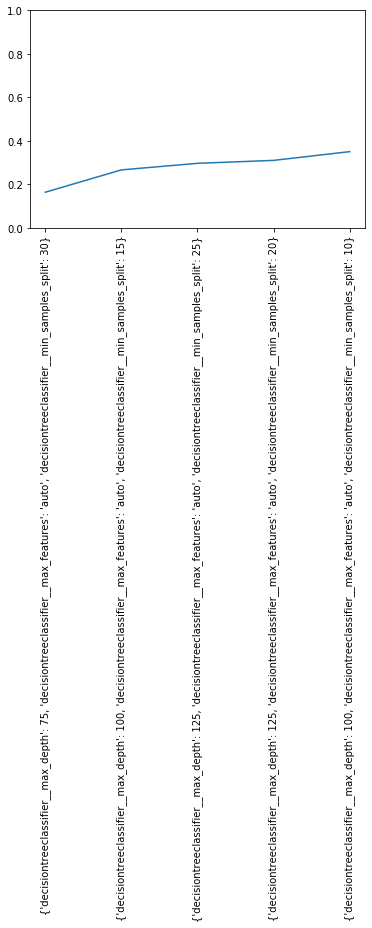

In [37]:
plot_df = dectree_results3.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df)))[::6], plot_df.mean_test_score[::6])
plt.xticks(list(range(len(plot_df)))[::6], list(map(str, plot_df.params))[::6], rotation=90)
plt.ylim(0,1)
plt.show()

## Auswertung:
kleiner Fehler in Run 1, Laben an Graph sind inkorrekt, Max_Depth 200 ist besser als 100

# Random Forest

In [38]:
randomforest_results3.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][:10]

,params,mean_test_score
3,{'randomforestclassifier__n_estimators': 1850},0.792381
2,{'randomforestclassifier__n_estimators': 1800},0.758413
0,{'randomforestclassifier__n_estimators': 1650},0.755238
1,{'randomforestclassifier__n_estimators': 1700},0.749603


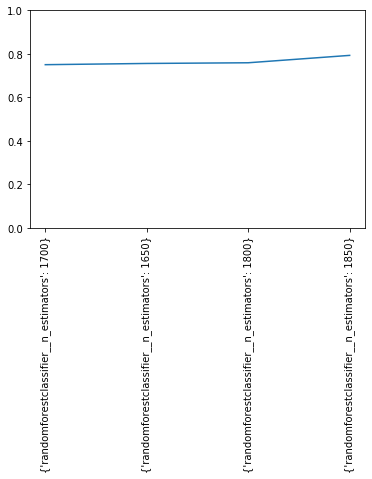

In [39]:
plot_df = randomforest_results3.sort_values('mean_test_score', ascending=True)
plt.plot(list(range(len(plot_df))), plot_df.mean_test_score)
plt.xticks(list(range(len(plot_df))), list(map(str, plot_df.params)), rotation=90)
plt.ylim(0,1)
plt.show()

## Auswertung:
1850 Estimators ergeben ein noch besseres Ergebnis -> Maximum zwischen 1800 und 2000

# 4. Run

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

from stop_words import get_stop_words


# Kleine Verbesserungen durch C-Wert von 50 im Run 3
pipe_logreg = make_pipeline(TfidfVectorizer(), LogisticRegression())
pipe_logreg_params = {
    'logisticregression__C': [75, 100, 300, 1000],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs']    
}
logreg = [pipe_logreg, pipe_logreg_params]



# SVM haben wir bereits ein MAximum über die C-Werte 3, 4 und 5

# Naive Bayes pendelt sich ein und nimmt konstante Werte an



# Decision Trees nochmal mit versch. Max_Depth Werten
# zusätzlich wurden auch ein paar kleinere und größere Werte gewählt
pipe_dectree = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
pipe_dectree_params = {
    'decisiontreeclassifier__max_features': ["auto"],
    'decisiontreeclassifier__max_depth': [175, 200, 250, 300 ,500],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10, 20, 25, 30, 40], 
}
dectree = [pipe_dectree, pipe_dectree_params]


# RAndom Forests nochmal genauere Estimator Werte
pipe_randomforest = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
pipe_randomforest_params = {
    'randomforestclassifier__n_estimators': [1825, 1875, 1900, 1925, 1950, 1975], # Das aktuelle Maximum liegt bei 1850 Estimators
}
randomforest = [pipe_randomforest, pipe_randomforest_params]

all_pipes_params = [logreg, dectree, randomforest]

In [41]:
tables_fourthrun = glob.glob('hyperparam_results/FourthRun/*.csv')
tables_fourthrun

['hyperparam_results/FourthRun\\decisiontreeclassifier_P1.csv',
 'hyperparam_results/FourthRun\\decisiontreeclassifier_P2.csv',
 'hyperparam_results/FourthRun\\decisiontreeclassifier_P3.csv',
 'hyperparam_results/FourthRun\\decisiontreeclassifier_P4.csv',
 'hyperparam_results/FourthRun\\decisiontreeclassifier_P5.csv',
 'hyperparam_results/FourthRun\\decisiontreeclassifier_P6.csv']

In [42]:

dectree_results4 = pd.read_csv('hyperparam_results/FourthRun/decisiontreeclassifier_P1.csv').dropna()


In [43]:
dectree_results4.sort_values('mean_test_score', ascending=False)[['params', 'mean_test_score']][['params', 'mean_test_score']][:10]

,params,mean_test_score
8,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 5}",0.407143
1,"{'decisiontreeclassifier__max_depth': 175, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 5}",0.387566
7,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 2}",0.386931
21,"{'decisiontreeclassifier__max_depth': 300, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 2}",0.386248
15,"{'decisiontreeclassifier__max_depth': 250, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 5}",0.376720
16,"{'decisiontreeclassifier__max_depth': 250, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.356349
24,"{'decisiontreeclassifier__max_depth': 300, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 20}",0.352679
22,"{'decisiontreeclassifier__max_depth': 300, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 5}",0.345556
23,"{'decisiontreeclassifier__max_depth': 300, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 10}",0.336481
10,"{'decisiontreeclassifier__max_depth': 200, 'decisiontreeclassifier__max_features': 'auto', 'decisiontreeclassifier__min_samples_split': 20}",0.318492


# Feature Tuning


In [44]:
feature_df = pd.read_csv('hyperparam_results/FeatRun/linearsvc_P1.csv').dropna()

In [45]:
feature_df.sort_values('mean_test_score', ascending=False)[['param_tfidfvectorizer__lowercase','param_tfidfvectorizer__max_features','param_tfidfvectorizer__ngram_range','mean_test_score']][:10]

,param_tfidfvectorizer__lowercase,param_tfidfvectorizer__max_features,param_tfidfvectorizer__ngram_range,mean_test_score
926,False,5000,"(1, 3)",0.769048
1030,False,10000,"(1, 5)",0.769048
1022,False,10000,"(1, 3)",0.769048
974,False,7500,"(1, 3)",0.769048
1126,False,15000,"(1, 5)",0.769048
982,False,7500,"(1, 5)",0.769048
886,False,2500,"(1, 5)",0.768175
1166,False,17500,"(1, 3)",0.765952
1070,False,12500,"(1, 3)",0.765952
1222,False,20000,"(1, 5)",0.765952
